In [1]:
import numpy.random as rand
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def computCost(X, theta, y, lamda):
    J = 0
    m = np.size(y, 0) * np.size(y, 1)
    J = np.sum( np.sum( ( np.matmul( X, np.transpose(theta) ) - y )**2 ) / (2 * m)) + lamda * np.sum(theta[:, 1:-1]) / (2 * m) + lamda * np.sum(X[:, 1:-1])  / (2 * m)  
    return J

In [23]:
print('visualization of Data...')
a = np.array([[5.,5.,0.,5.,5.],[0.,0.,0.,5.,5.],[5.,5.,0.,0.,0.],[5.,0.,5.,0.,5.],[0.,5.,5.,5.,0.]]) # Training data
print(a)

#Gen fitures
x = np.random.sample((4, 5))
theta = np.random.sample((4, 5))
x = np.vstack((np.ones((1, 5)), x))
theta = np.vstack((np.ones((1, 5)), theta))

x  = np.transpose(x)
theta = np.transpose(theta)

print('visualization of parameters x...')
print (x)
print('visualization of parameters theta...')
print (theta)

# useful parametrs
lamda = 1
alpfa = 0.01
step = 100
swaps = 10


visualization of Data...
[[5. 5. 0. 5. 5.]
 [0. 0. 0. 5. 5.]
 [5. 5. 0. 0. 0.]
 [5. 0. 5. 0. 5.]
 [0. 5. 5. 5. 0.]]
visualization of parameters x...
[[1.         0.9471722  0.03518143 0.8228536  0.0081647 ]
 [1.         0.01813482 0.94338322 0.22468851 0.75419993]
 [1.         0.52375871 0.93941241 0.85729971 0.81122638]
 [1.         0.22281103 0.22150347 0.0303106  0.32460712]
 [1.         0.93816933 0.98529471 0.96926892 0.19866252]]
visualization of parameters theta...
[[1.         0.05286845 0.63263842 0.21245268 0.17399472]
 [1.         0.72388997 0.684621   0.20816625 0.33561162]
 [1.         0.25877631 0.59169162 0.7012093  0.49101603]
 [1.         0.70961011 0.3541759  0.51018244 0.2668036 ]
 [1.         0.64146497 0.73542603 0.53691547 0.22871247]]


4.024252216359269
Predicting...
[[5. 5. 0. 5. 5.]
 [0. 0. 0. 5. 5.]
 [5. 5. 0. 0. 0.]
 [5. 0. 5. 0. 5.]
 [0. 5. 5. 5. 0.]]
accurancy...
100.0
plot cost history...


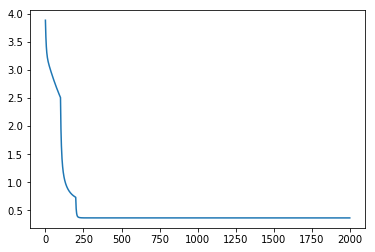

In [24]:
#initial val
initialCost = computCost(x, theta, a, lamda) 
print(initialCost)

history = np.zeros((1, 1000000))
i = 0;
# Start Colab. filtering
for k in range(0, swaps):
    for  v in range(0, step):
        Grad_x = np.matmul((np.matmul(x, np.transpose(theta)) - a), theta)
        x = x - alpfa * Grad_x
        history[0, i] = computCost(x, theta, a, lamda)
        i += 1
        #print(computCost(x, theta, a, lamda))
    for  v in range(0, step):
        Grad_theta = np.matmul(np.transpose((np.matmul(x, np.transpose(theta)) - a)), x)
        theta = theta - alpfa * Grad_theta
        history[0, i] = computCost(x, theta, a, lamda)
        i += 1
        #print(computCost(x, theta, a, lamda))
        


#predict
print("Predicting...")
Pred = np.matmul(x, np.transpose(theta))
Pred = np.abs(np.round(Pred, 1))

print(Pred)
#accurancy
print('accurancy...')
print(np.average(np.array_equal(Pred, a)) * 100)

#checking
print("plot cost history...")
plt.plot(range(0, i), history[0, range(0, i)])